# Analyzing Spotify's Audio Analysis Data
Spotify's Web API has an endpoint to "Get Audio Features for a Track", which returns a numerical analysis of a song's various features. The API returns some interesting metrics, including but not limited to, "danceability", "valence", or "energy".

**Could we use Spotify's audio analysis to predict the genre of a song?**

## Data Collection & Cleaning
I called Spotify's "Get Recommendations Based on Seeds" endpoint to get songs for a number of genres (classical, country, electronic, hip-hop, jazz, pop, rock), and get the audio analysis for each song by calling the "Get Audio Features for Several Tracks" endpoint. 

The tracks' audio analyses were labeled with the genre they were seeded and then merged into a single dataframe, df_audio.

In [1]:
from google.colab import drive
import pandas as pd

# Mount the drive
drive.mount('/content/gdrive')

# Read in audio.csv from the gdrive into a DataFrame
df_audio = pd.read_csv('gdrive/My Drive/audio.csv')
df_audio

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,0,0.579,0.9460,9,-2.732,0,0.0540,0.000128,0.000024,0.3350,0.4000,99.937,audio_features,6Rt9GlwZEDU0V3vhXrUNqJ,spotify:track:6Rt9GlwZEDU0V3vhXrUNqJ,https://api.spotify.com/v1/tracks/6Rt9GlwZEDU0...,https://api.spotify.com/v1/audio-analysis/6Rt9...,228053,4,rock
1,1,0.346,0.8970,4,-5.044,1,0.0678,0.122000,0.000082,0.3580,0.6610,101.744,audio_features,4YyOPaXcxCmpv3c7SQUo5e,spotify:track:4YyOPaXcxCmpv3c7SQUo5e,https://api.spotify.com/v1/tracks/4YyOPaXcxCmp...,https://api.spotify.com/v1/audio-analysis/4YyO...,183253,4,rock
2,2,0.640,0.8640,7,-6.576,1,0.0315,0.008320,0.000000,0.1230,0.7000,102.026,audio_features,42et6fnHCw1HIPSrdPprMl,spotify:track:42et6fnHCw1HIPSrdPprMl,https://api.spotify.com/v1/tracks/42et6fnHCw1H...,https://api.spotify.com/v1/audio-analysis/42et...,268360,4,rock
3,3,0.361,0.9700,7,-4.817,0,0.2840,0.001690,0.001630,0.3570,0.2540,179.017,audio_features,7GonnnalI2s19OCQO1J7Tf,spotify:track:7GonnnalI2s19OCQO1J7Tf,https://api.spotify.com/v1/tracks/7GonnnalI2s1...,https://api.spotify.com/v1/audio-analysis/7Gon...,282920,4,rock
4,4,0.666,0.9360,7,-9.919,1,0.0476,0.002440,0.086000,0.1530,0.7760,91.577,audio_features,0uppYCG86ajpV2hSR3dJJ0,spotify:track:0uppYCG86ajpV2hSR3dJJ0,https://api.spotify.com/v1/tracks/0uppYCG86ajp...,https://api.spotify.com/v1/audio-analysis/0upp...,282907,4,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,95,0.239,0.2490,2,-12.373,0,0.0349,0.977000,0.876000,0.0967,0.1580,168.814,audio_features,77Z7XS4SNSN7EZve9nkPGP,spotify:track:77Z7XS4SNSN7EZve9nkPGP,https://api.spotify.com/v1/tracks/77Z7XS4SNSN7...,https://api.spotify.com/v1/audio-analysis/77Z7...,229013,4,classical
696,96,0.214,0.2720,2,-13.276,1,0.0383,0.865000,0.916000,0.1150,0.1240,113.469,audio_features,3OtYYnDKs5oMzRorc4jnpW,spotify:track:3OtYYnDKs5oMzRorc4jnpW,https://api.spotify.com/v1/tracks/3OtYYnDKs5oM...,https://api.spotify.com/v1/audio-analysis/3OtY...,348773,4,classical
697,97,0.287,0.0685,0,-23.712,0,0.0425,0.996000,0.909000,0.2180,0.1740,64.955,audio_features,5mTcBl0HXShCJuMV0hXbo6,spotify:track:5mTcBl0HXShCJuMV0hXbo6,https://api.spotify.com/v1/tracks/5mTcBl0HXShC...,https://api.spotify.com/v1/audio-analysis/5mTc...,398362,4,classical
698,98,0.225,0.0385,0,-28.038,1,0.0484,0.976000,0.000000,0.0822,0.0344,66.230,audio_features,7ePJDGh6zM0XrOslnnz1Rj,spotify:track:7ePJDGh6zM0XrOslnnz1Rj,https://api.spotify.com/v1/tracks/7ePJDGh6zM0X...,https://api.spotify.com/v1/audio-analysis/7ePJ...,183867,4,classical


## Data Analysis
Graphing the mean value of each features by genre will help show any differences between genres. If the audio features are going to be any use for training a model, they ought to have different values on average for each genre.

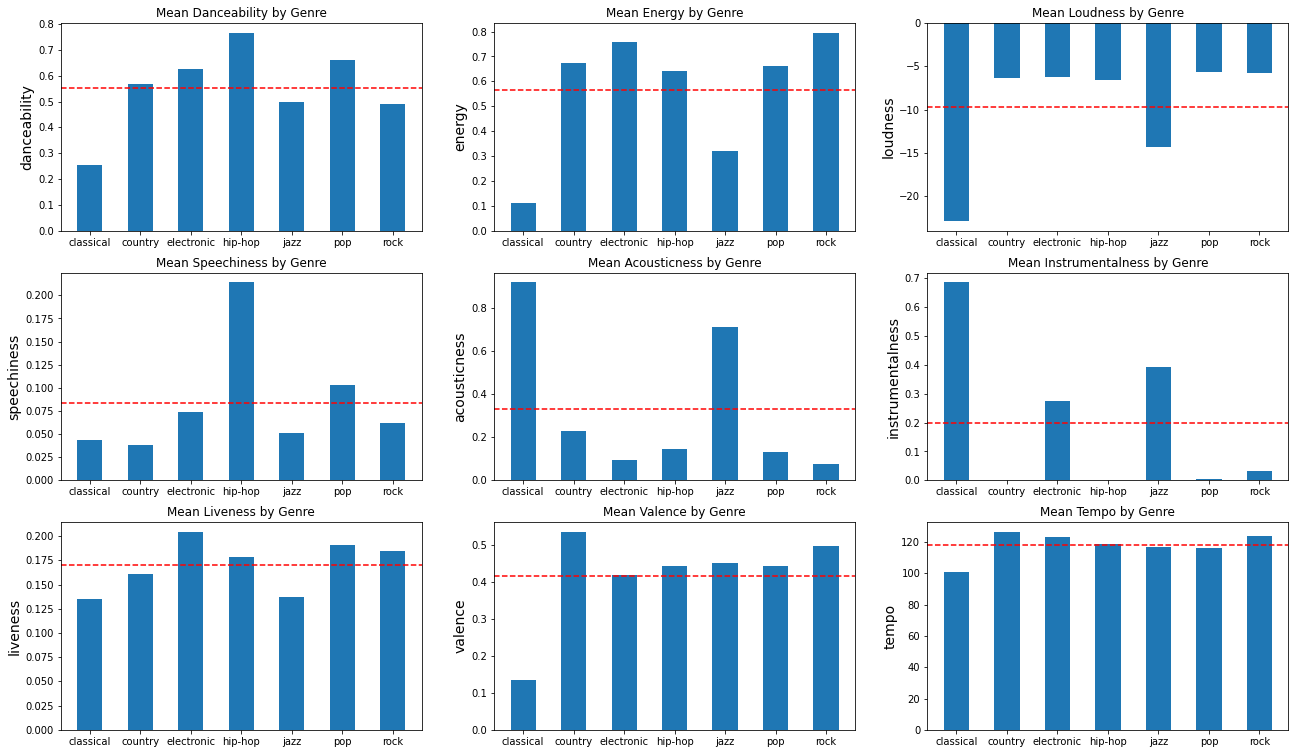

In [2]:
from IPython.display import Image

Image("gdrive/My Drive/bargraph.png")

Graphing scatterplots will help show any relationships between features. Clusters in the scatterplots ought to show that there are indeed categories of songs, according to the features.

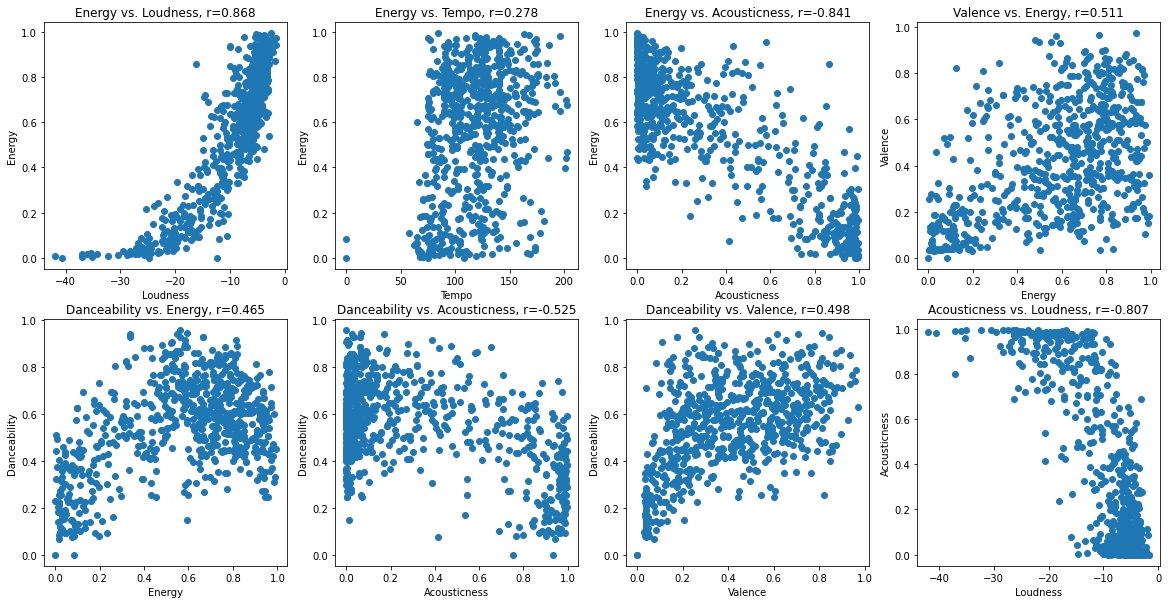

In [3]:
Image("gdrive/My Drive/scatterplot.png")

## Predicting Genre
To predict genre, I trained a k-nearest neighbors classifier model. I used GridSearch to opimitze for k, the distance metric, and the features to use. Ended up using acousticness, danceability, energy, loudness, instrumentalness, speechiness, and valence.

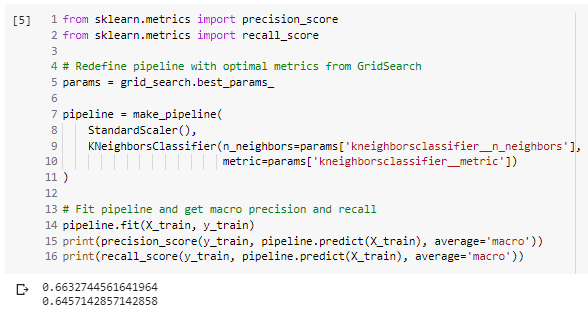

In [4]:
Image("gdrive/My Drive/scores.png")

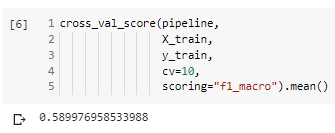

In [5]:
Image("gdrive/My Drive/f1.png")

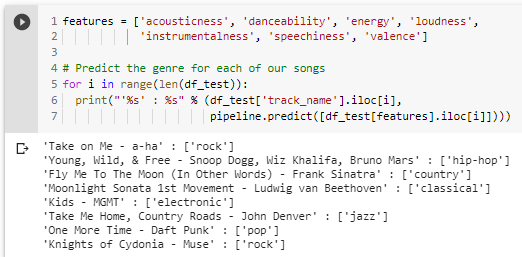

In [6]:
Image("gdrive/My Drive/examplesongs.png")